<a href="https://colab.research.google.com/github/jhonix007/time-series/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B51_%D0%B2%D1%80_%D1%80%D1%8F%D0%B4%D1%8B_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
################
 # Dickey-Fuller
##################
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [84]:
sales_of_company_x = pd.read_csv("drive/MyDrive/Нетология/Data Science/Временные ряды/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("drive/MyDrive/Нетология/Data Science/Временные ряды/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("drive/MyDrive/Нетология/Data Science/Временные ряды/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("drive/MyDrive/Нетология/Data Science/Временные ряды/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("drive/MyDrive/Нетология/Data Science/Временные ряды/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("drive/MyDrive/Нетология/Data Science/Временные ряды/daily-total-female-births-in-cal.csv")

In [23]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

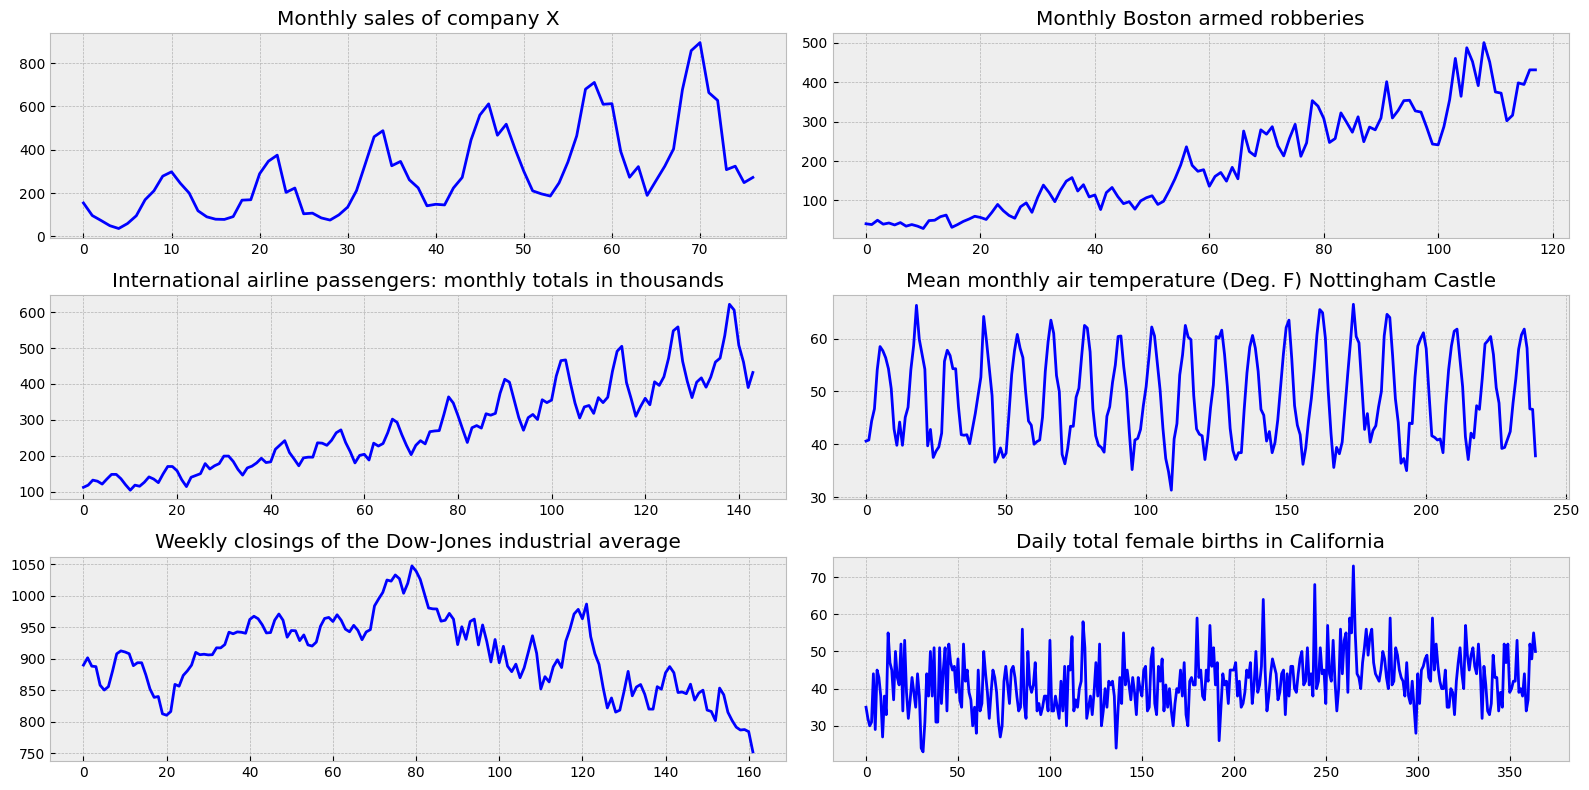

In [6]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)

    plt.tight_layout()


# **1. Monthly sales of company X"**

Проверка стационарности Monthly sales of company X

In [75]:
test_stationarity(all_series["Monthly sales of company X"])

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


Ряд Monthly sales of company X имеет p-value больше, чем 0.05, следовательно исходный ряд не стационарен

#Нормализуем дисперсию

In [76]:
sales_of_company_x = boxcox(all_series["Monthly sales of company X"], 0)

## Продифференцируем

In [77]:
sales_of_company_x = np.diff(sales_of_company_x , 1)

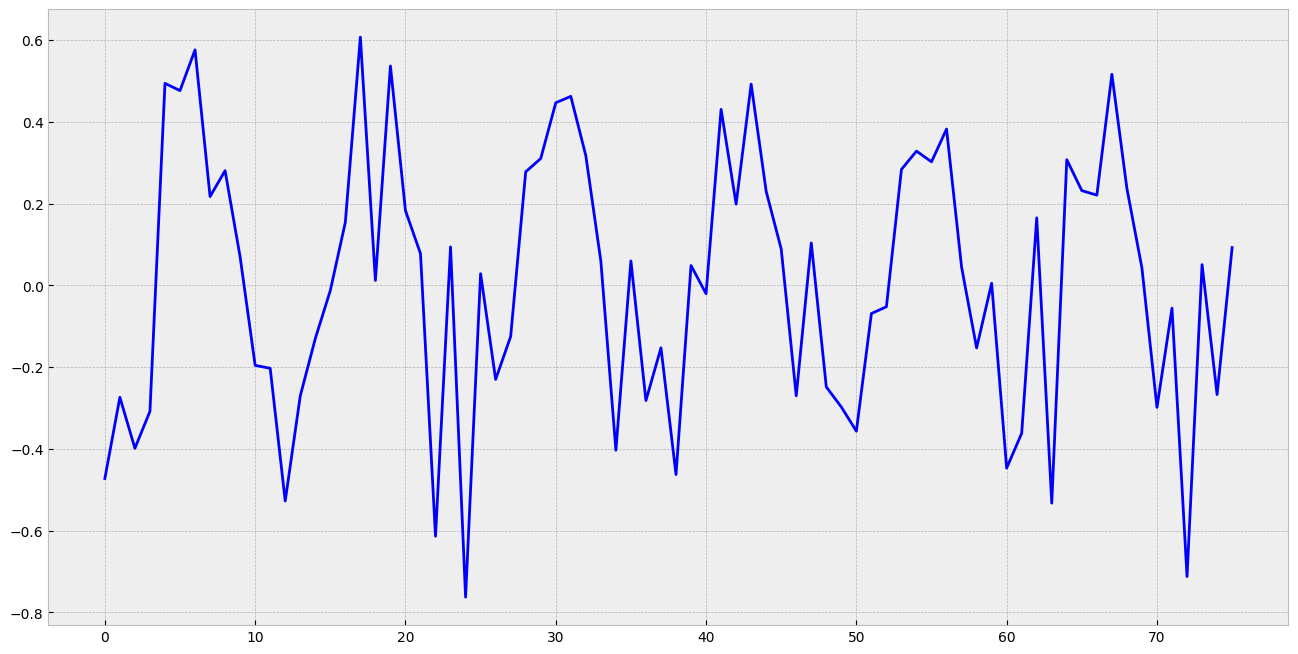

In [78]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(sales_of_company_x, color='blue')

Визуально cтало лучше, по сравнению с исходным, но сделать однозначно вывод нельзя, сделаем тест Дики-Фулера.

## Тест Дики-Фуллера

In [79]:
test_stationarity(sales_of_company_x)

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


Ряд Monthly sales of company X имеет p-value меньше, чем 0.05 после логарифмирования и  дифференцирования, следовательно ряд стал стационарен

#2. Monthly Boston armed robberies

Проверка стационарности Monthly Boston armed robberies

In [111]:
test_stationarity(all_series["Monthly Boston armed robberies"])

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


Ряд Monthly Boston armed robberies имеет p-value больше, чем 0.05, следовательно исходный ряд не стационарен

## Нормализуем дисперсию

In [112]:
robberies_in_boston = boxcox(all_series["Monthly Boston armed robberies"], 0)

## Продифференцируем

In [113]:
robberies_in_boston  = np.diff(robberies_in_boston, 1)

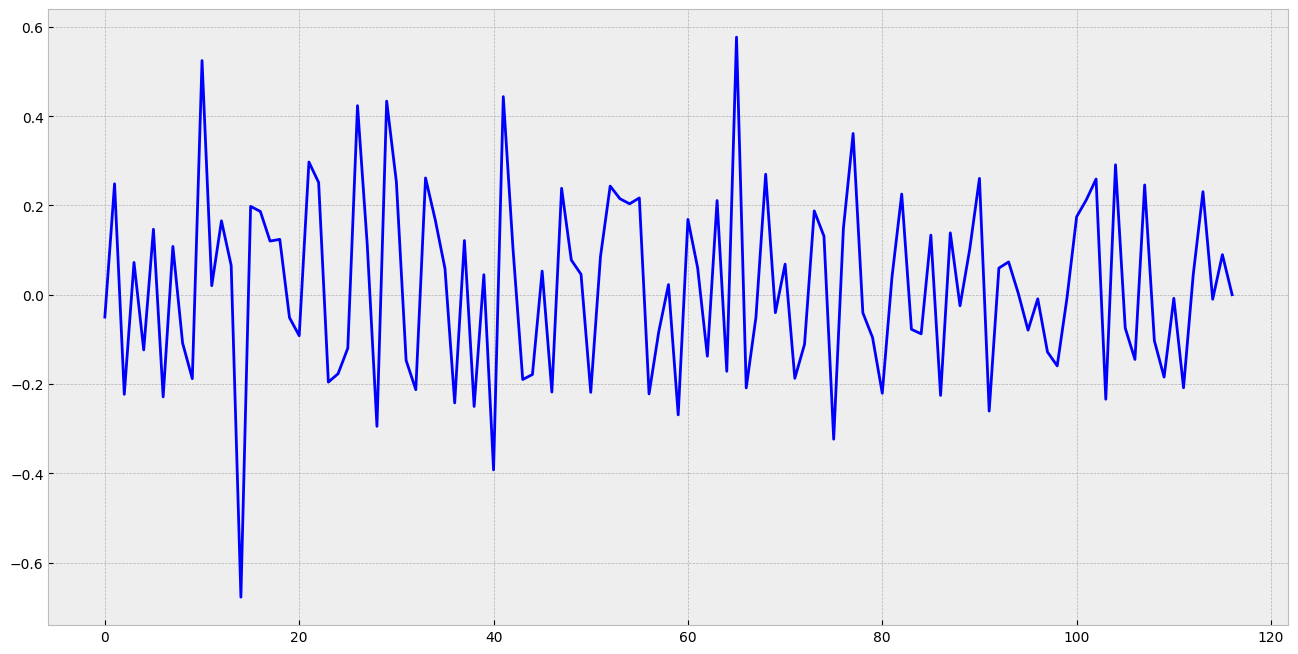

In [69]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot( robberies_in_boston, color='blue')

Визуально ряд выглядит стационарным.

## Тест Дики-Фуллера

In [114]:
test_stationarity(robberies_in_boston)

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


Ряд Monthly Boston armed robberies имеет p-value меньше, чем 0.05 после логарифмирования и дифференцирования, следовательно ряд  стал стационарен.

#3. International airline passengers: monthly totals in thousands

Проверка стационарности International airline passengers: monthly totals in thousands

In [102]:
test_stationarity(all_series["International airline passengers: monthly totals in thousands"])

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


International airline passengers: monthly totals in thousands имеет p-value больше, чем 0.05, следовательно исходный ряд не стационарен

## Нормализуем дисперсию

In [103]:
airlines_passengers = boxcox(all_series["International airline passengers: monthly totals in thousands"], 0)

## Продифференцируем

In [104]:
airlines_passengers =  np.diff(airlines_passengers , 1)

##Уберем влияние сезонности, так как на исходном графике она видна явно

In [105]:
airlines_passengers =airlines_passengers[12:] - airlines_passengers[:-12]

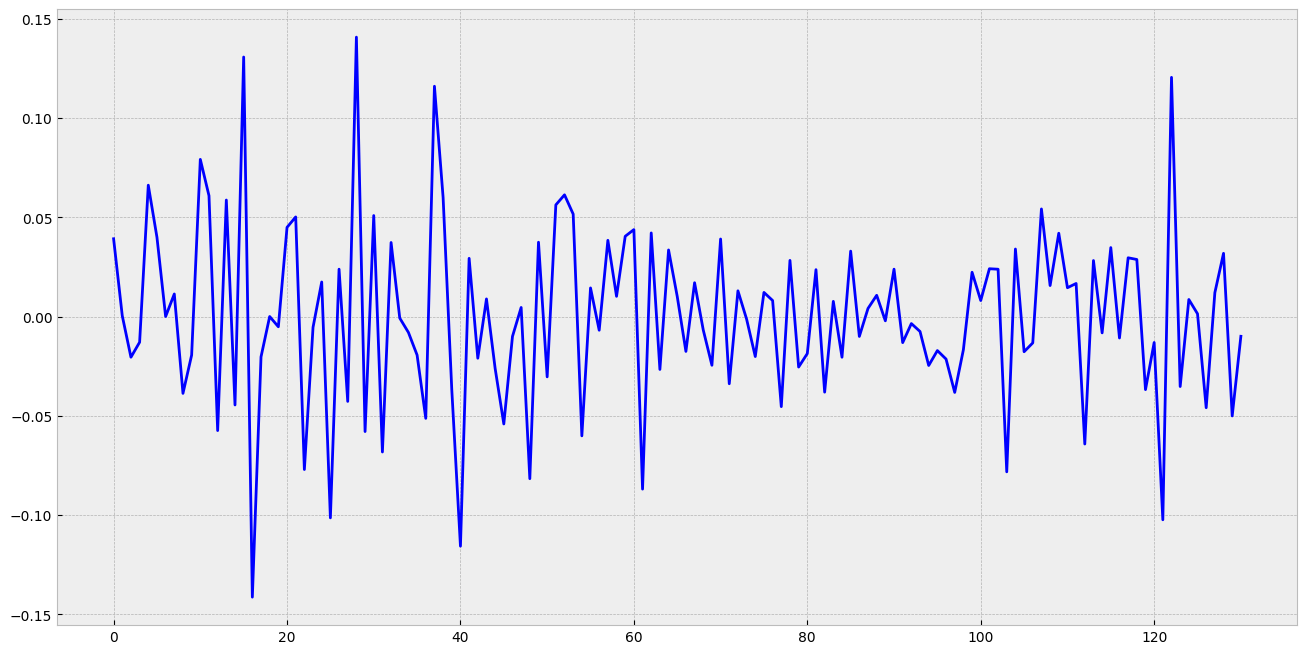

In [106]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(airlines_passengers, color='blue')

Визуально cтало лучше, по сравнению с исходным, но сделать однозначно вывод нельзя, сделаем тест Дики-Фулера.

In [107]:
test_stationarity(airlines_passengers)

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


Ряд International airline passengers: monthly totals in thousands имеет p-value меньше, чем 0.05 после логарифмирования, дифференцирования и дифференцирования по сезонности, следовательно ряд стал стационарен.

#4. Mean monthly air temperature (Deg. F) Nottingham Castle

Проверка стационарности Mean monthly air temperature (Deg. F) Nottingham Castle

In [108]:
test_stationarity(all_series["Mean monthly air temperature (Deg. F) Nottingham Castle"])

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


Вывод: ряд  Mean monthly air temperature (Deg. F) Nottingham Castle имеет p-value меньше, чем 0.05, следовательно исходный ряд стационарен

#5. Weekly closings of the Dow-Jones industrial average

Проверка стационарности Weekly closings of the Dow-Jones industrial average

In [109]:
test_stationarity(all_series["Weekly closings of the Dow-Jones industrial average"])

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


 Weekly closings of the Dow-Jones industrial averages имеет p-value больше, чем 0.05, следовательно исходный ряд не стационарен

## Продифференцируем

In [115]:
dowjones_closing  = np.diff(all_series["Weekly closings of the Dow-Jones industrial average"], 1)

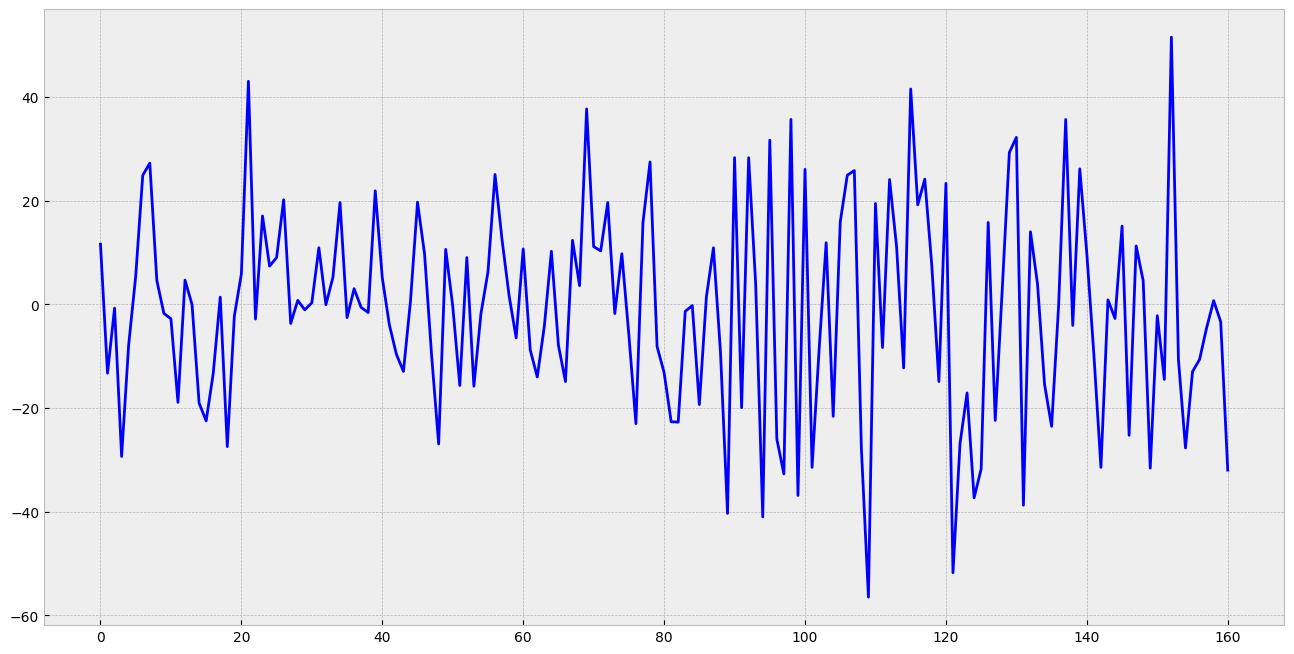

In [117]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(dowjones_closing, color='blue')

Визуально cтало лучше, по сравнению с исходным, но сделать однозначно вывод нельзя, сделаем тест Дики-Фулера.

In [116]:
test_stationarity(dowjones_closing )

Results of Dickey-Fuller Test:
Test Statistic                -1.302521e+01
p-value                        2.407586e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


Ряд Weekly closings of the Dow-Jones industrial average имеет p-value меньше, чем 0.05 после дифференцирования, следовательно ряд стал стационарен.

#6. Daily total female births in California

Проверка стационарности Daily total female births in California

In [118]:
test_stationarity(all_series["Daily total female births in California"])

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


Вывод: ряд  Daily total female births in California имеет p-value меньше, чем 0.05, следовательно исходный ряд стационарен